In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import json
import subprocess
import datetime

from pathlib import Path
from scipy.io import loadmat, savemat

In [19]:
import subprocess

# Define your MATLAB function's arguments
N = 2**7 + 1  # Example value; adjust as needed
dt = 1e-4  # Example value; adjust as needed
T_end = 1  # Example value; adjust as needed
# mus = "0.01:0.01:0.1"  # MATLAB array syntax
Mp = 10
K = T_end / dt
DS = 1

In [213]:
# define perturbations to the nominal parameter mu=0.01. Perturbations of +-0.001% and +-0.01% are considered.
nominal_mu = 0.01
# perturbations in percentage
perturbations = [0.001, 0.01]
# perturbations = [0.0001, 0.0005]
mus = [nominal_mu * (1 + pert) for pert in perturbations] + [nominal_mu * (1 - pert) for pert in perturbations]
print(mus)


[0.01001, 0.0101, 0.00999, 0.0099]


In [214]:
import json

datapath = '/data1/jy384/research/Data/UnimodalSROB/Burgers/'
srcpath = '/home/jy384/projects/UnimodalSROB/examples/burgers/'


# generate number UID based on perturbations, by creating a number based on the perturbations
scaling = 1e-6
uid = str('_'.join([str(int(pert * 1/scaling)) for pert in perturbations]))

config = {
    "N": 2**7 + 1,
    "dt": 1e-4,
    "T_end": 1,
    "mus": mus,
    "nominal_mu": nominal_mu*1/scaling,
    "Mp": 10,
    "K": 1 / 1e-4,  # T_end / dt
    "DS": 1,
    "params": {
        "modelform": "LQIPC",
        "modeltime": "continuous",
        "dt": 1e-4,
        "ddt_order": "2imp",
        "p": 0, # polynomial order
        "lambda1": 0.1,
        "lambda2": 0.1,
        "lambda3": 0.1,
    },
    "perturbations": perturbations,
    "uid": uid,
    "uid_naming_scale": scaling,
    
}

# unique config file for each perturbation experiment 
config_path = Path(srcpath) / 'configs'/ f'config_nominalmu_{nominal_mu}_perturb_{uid}.json'

with open(config_path, 'w') as f:
    json.dump(config, f)


In [215]:
# Proper command to call your MATLAB function
matlab_cmd = (
    f"matlab -batch \"addpath('/home/jy384/projects/UnimodalSROB/examples/burgers/burgers-helpers'); "
    f"runburgers({N}, {dt}, {T_end}, [{mus}], {Mp}, {DS}, '{config_path}'); exit;\""
)

# Use subprocess to call MATLAB
subprocess.run(matlab_cmd, shell=True, check=True)

MATLAB is selecting SOFTWARE OPENGL rendering.
Running Burgers equation data generation
Parameters:
N = 129
dt = 0.0001
T_end = 1
mus = 0.01001      0.0101     0.00999      0.0099
Mp = 10
DS = 1
mu = 0.01001
mu = 0.0101
mu = 0.00999
mu = 0.0099
       99980           4



CompletedProcess(args='matlab -batch "addpath(\'/home/jy384/projects/UnimodalSROB/examples/burgers/burgers-helpers\'); runburgers(129, 0.0001, 1, [[0.01001, 0.0101, 0.00999, 0.0099]], 10, 1, \'/home/jy384/projects/UnimodalSROB/examples/burgers/configs/config_perturb_1000_10000.json\'); exit;"', returncode=0)

In [216]:
mu_start = mus[0]
mu_end = mus[-1]
mu_step = mus[1] - mus[0]

print(mu_start, mu_end, mu_step)

0.01001 0.0099 8.99999999999998e-05


In [217]:
mu_step

8.99999999999998e-05

In [218]:
# check and load data
mu_start = mus[0]
mu_end = mus[-1]
mu_step = mus[1] - mus[0]

trajectories_path = Path(datapath) / 'trajectories'
snapshots_path = Path(datapath) / 'snapshots'
snapshotsDerivatives_path = Path(datapath) / 'snapshotsDerivatives'


if not perturbations:
    
    print("No Perturbations")
    
    # Find the files 
    U_all_files = list(Path(datapath).rglob(f'U_all_mu_*'))
    X_all_files = list(Path(datapath).rglob(f'X_all_mu_*'))
    R_all_files = list(Path(datapath).rglob(f'R_all_mu_*'))

    # Load the data with the mu_start, mu_end, and mu_step in their names
    if U_all_files:
        for file in U_all_files:
            if str(mu_start) in file.name and str(mu_end) in file.name and str(mu_step) in file.name:
                print(file)
                U_all = loadmat(file)['U_all']
    if X_all_files:
        for file in X_all_files:
            if str(mu_start) in file.name and str(mu_end) in file.name and str(mu_step) in file.name:
                print(file)
                X_all = loadmat(file)['X_all']
    if R_all_files:
        for file in R_all_files:
            if str(mu_start) in file.name and str(mu_end) in file.name and str(mu_step) in file.name:
                print(file)
                R_all = loadmat(file)['R_all']
            
else:
    
    print('Files for Perturbations:', perturbations)
    
    # Find the files
    U_all_files = list(Path(datapath).rglob(f'U_all_nominalmu_{nominal_mu}_perturb*'))
    X_all_files = list(Path(datapath).rglob(f'X_all_nominalmu_{nominal_mu}_perturb*'))
    R_all_files = list(Path(datapath).rglob(f'R_all_nominalmu_{nominal_mu}_perturb*'))
    
    # Load the data without the mu_start, mu_end, and mu_step in their names
    if U_all_files:
        for file in U_all_files:
            if str(uid) in file.name:
                print(file)
                U_all = loadmat(file)['U_all']
    if X_all_files:
        for file in X_all_files:
            if str(uid) in file.name:
                print(file)
                X_all = loadmat(file)['X_all']
    if R_all_files:
        for file in R_all_files:
            if str(uid) in file.name:
                print(file)
                R_all = loadmat(file)['R_all']

Files for Perturbations: [0.001, 0.01]
/data1/jy384/research/Data/UnimodalSROB/Burgers/trajectories/U_all_perturb_1000_10000.mat
/data1/jy384/research/Data/UnimodalSROB/Burgers/snapshots/X_all_perturb_1000_10000.mat
/data1/jy384/research/Data/UnimodalSROB/Burgers/snapshotsDerivatives/R_all_perturb_1000_10000.mat


In [219]:
# Convert cell arrays to numpy arrays for X_all and R_all
X_all = np.array([X_all[0][i] for i in range(X_all.shape[1])])
R_all = np.array([R_all[0][i] for i in range(R_all.shape[1])])

print(U_all.shape, X_all.shape, R_all.shape)

(99980, 4) (4, 129, 99980) (4, 129, 99980)


# SVD of X to get ROB 

S =  [864.05977705 232.07741833 104.20024521  66.74017992  39.21551873]
idx =  9
rel_err_SVD[idx] =  8.744971948804192e-07
S =  [864.41830824 230.85266098 103.98268165  66.73067786  38.86181736]
idx =  9
rel_err_SVD[idx] =  8.476020613157331e-07
S =  [865.86325856 234.07433941 105.12114491  66.99231185  39.30698423]
idx =  9
rel_err_SVD[idx] =  9.195304386810932e-07
S =  [861.76637451 231.08632864 103.89101752  66.7348984   39.19362962]
idx =  9
rel_err_SVD[idx] =  9.054090391868996e-07


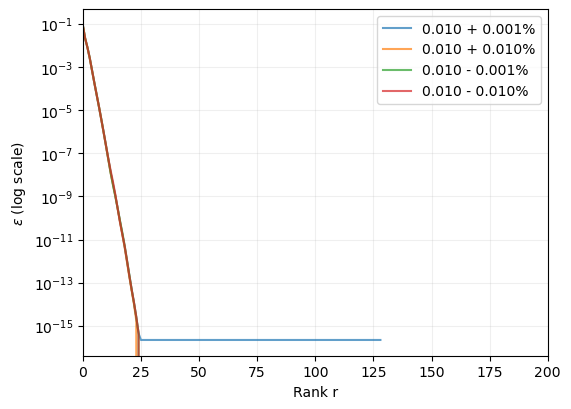

In [220]:
rob_lst = []
rel_err_SVD_lst = []
idx_lst = []

# determine float precision for mus so that it can be used as labels
precision = np.log10(1/np.min(perturbations))
# names is for each perturbation, plus then minus, 
# for example: nominal_mu=0.01, perturbations=[0.001, 0.01], then names = ['0.01 + 0.001%', '0.01 + 0.01%', '0.01 - 0.001%', '0.01 - 0.01%']
names = [f'{mu:.{int(precision)}f} + {pert:.{int(precision)}f}%' for mu in [nominal_mu] for pert in perturbations] + [f'{mu:.{int(precision)}f} - {pert:.{int(precision)}f}%' for mu in [nominal_mu] for pert in perturbations]

fig, ax = plt.subplots(figsize=(6, 4.5))


for i in range(len(mus)):
    # svd
    U, S, V = np.linalg.svd(X_all[i, :, :], full_matrices=False)
    print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (K*Mp-1))
    # print("eigvals_SVD = \n", eigvals_SVD[:5])
    # append U
    # print("U = ", U.shape)
    rob_lst.append(U)
    
    # calculate the relative error
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD <= 1e-6)[0][0]
    idx_lst.append(idx)
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.legend()

In [221]:
proj_error_lst = []

for r in range(20):
    proj_error = (1/len(mus)) * np.sum([(np.linalg.norm(X_all[i, :, :] - rob_lst[i][:, :r] @ rob_lst[i][:, :r].T @ X_all[i, :, :], ord='fro')**2)/np.linalg.norm(X_all[i, :, :], ord='fro')**2 for i in range(len(mus))])
    # proj_error = (1/len(mus)) * np.sum([(np.linalg.norm(X_all[i, :, :] - X_all[i, :, :].T @ rob_lst[i][:, r] @ rob_lst[i][:, r].T, ord='fro')**2)/np.linalg.norm(X_all[i, :, :], ord='fro')**2 for i in range(len(mus))])
    print("proj_error = ", proj_error)
    proj_error_lst.append(proj_error)
        

proj_error =  1.0
proj_error =  0.08711747027123648
proj_error =  0.021287507441238574
proj_error =  0.007985449313417943
proj_error =  0.0025290263809657617
proj_error =  0.0006552807858530013
proj_error =  0.00017587577635634155
proj_error =  4.920406780280268e-05
proj_error =  1.356025745150655e-05
proj_error =  3.5591028494872574e-06
proj_error =  8.867596835302163e-07
proj_error =  2.1341574281498945e-07
proj_error =  5.102397926062592e-08
proj_error =  1.291811526320019e-08
proj_error =  3.728562212080436e-09
proj_error =  1.0803893726918299e-09
proj_error =  2.7191131818543967e-10
proj_error =  6.667401836333939e-11
proj_error =  1.8380622267986617e-11
proj_error =  4.850545368233299e-12


idx =  10


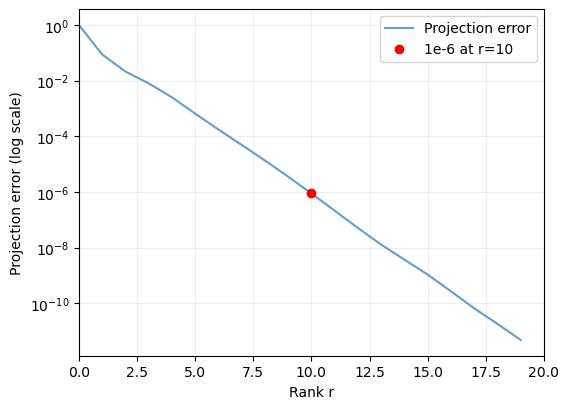

In [222]:
# plot the projection error
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(proj_error_lst, label="Projection error", linestyle='-', alpha=0.7)

# plot the first idx when it is less than 1e-5
idx = np.where(np.array(proj_error_lst) < 1e-6)[0][0]
print("idx = ", idx)
ax.plot(idx, proj_error_lst[idx], 'ro', label=f"1e-6 at r={idx}")

ax.set_yscale('log')
ax.set_ylabel("Projection error (log scale)")
# set limit
ax.set_xlim([0, 20])
# ax.set_ylim([1e-13, 1e-3])
# show grid
ax.grid(True, alpha=0.2)
ax.set_xlabel("Rank r")
ax.legend()
plt.show()

# Define truncation order r

In [223]:
# r = np.max(idx_lst)
r = 15
print("r = ", r)

print("Shape of the robs = ", np.array(rob_lst).shape)

r =  15
Shape of the robs =  (4, 129, 129)


# Get the ROBs and save them for matlab OpInf routine

In [224]:
# rob_lst = np.array(rob_lst)
# print("rob_lst = ", rob_lst.shape)

# truncation of the ROBs
# rob_lst = rob_lst[:, :, :r]
# print("truncated rob_lst = ", rob_lst.shape)

# # make it a suitable shape for matlab routine, where ROBs are stored in the third dimension
# rob_lst = np.moveaxis(rob_lst, 0, 2)
# print("rob_lst = ", rob_lst.shape)

rob_arr = []

for i in range(len(mus)):
    rob_arr.append(rob_lst[i][:, :r])
    
rob_arr = np.array(rob_arr)
print("rob_arr = ", rob_arr.shape)

rob_arr = np.transpose(rob_arr, (1, 2, 0))
print("rob_arr = ", rob_arr.shape)
    

rob_arr =  (4, 129, 15)
rob_arr =  (129, 15, 4)


In [225]:
# save the ROBs as Vr_all.mat at datapath
# savemat(f'{datapath}/Vr_all.mat', {'Vr_all': rob_lst})
ROBs_path = Path(datapath) / 'ROBs'
if perturbations:
    savemat(f'{ROBs_path}/Vr_all_perturb_{uid}.mat', {'Vr_all': rob_arr})
else:
    savemat(f'{ROBs_path}/Vr_all_mu_{mu_start}_{mu_step}_{mu_end}.mat', {'Vr_all': rob_arr})

# Matlab routine for OpInf

In [226]:
# params.modelform = 'LQI';           % model is linear-quadratic with input term
# params.modeltime = 'continuous';    % learn time-continuous model
# params.dt        = dt;              % timestep to compute state time deriv
# params.ddt_order = '1ex';           % explicit 1st order timestep scheme

# % Inputs:
# %   - params: parameters for the operator inference, including:
# %       - modelform: model form of the operator
# %       - modeltime: model time of the operator
# %       - dt: timestep to compute state time derivative
# %       - ddt_order: explicit 1st order timestep scheme
# %   - mus: parameter values
# %   - r: POD basis order
# %   - X_all: state data
# %   - R_all: RHS data (residual)
# %   - U_all: input data
# %   - Vr_all: truncated POD basis


# update config file with truncation order r
config['robparams'] = {
    "r": int(r)
}

with open(Path(srcpath) / 'configs'/ 'config_perturb_{:s}.json'.format(uid), 'w') as f:
    json.dump(config, f)



matlab_opinf_cmd = (
    f"matlab -batch \"addpath('/home/jy384/projects/UnimodalSROB/examples/burgers/'); "
    f"run_burgersOpInf('{config_path}'); exit;\""
)

# Use subprocess to call MATLAB
subprocess.run(matlab_opinf_cmd, shell=True, check=True)

MATLAB is selecting SOFTWARE OPENGL rendering.
    Vr_all: [129x15x4 double]


Vr_all = 

  struct with fields:

    Vr_all: [129x15x4 double]

Operators are inferred.
Operators are inferred.
Operators are inferred.
Operators are inferred.
Solving for mu = 0.01001
Bhat is not empty
Solving for mu = 0.0101
Bhat is not empty
Solving for mu = 0.00999
Bhat is not empty
Solving for mu = 0.0099
Bhat is not empty


CompletedProcess(args='matlab -batch "addpath(\'/home/jy384/projects/UnimodalSROB/examples/burgers/\'); run_burgersOpInf(\'/home/jy384/projects/UnimodalSROB/examples/burgers/configs/config_perturb_1000_10000.json\'); exit;"', returncode=0)

In [227]:
# Read s_ref_all.mat and s_rec_all.mat
reconstructedState_path = Path(datapath) / 'reconstructedState'
referenceState_path = Path(datapath) / 'referenceState'

if config['perturbations']:
    s_ref_all = loadmat(f'{referenceState_path}/s_ref_all_nominalmu_{nominal_mu}_perturb_{uid}.mat')['s_ref_all']
    s_rec_all = loadmat(f'{reconstructedState_path}/s_rec_all_nominalmu_{nominal_mu}_perturb_{uid}.mat')['s_rec_all']
else:
    s_ref_all = loadmat(f'{referenceState_path}/s_ref_all_mu_{mu_start}_{mu_step}_{mu_end}.mat')['s_ref_all']
    s_rec_all = loadmat(f'{reconstructedState_path}/s_rec_all_mu_{mu_start}_{mu_step}_{mu_end}.mat')['s_rec_all']

# extract the tensors from the cell arrays
s_ref_all = np.array([s_ref_all[i][0] for i in range(s_ref_all.shape[0])])
# s_ref_all = [s_ref_all[i][0] for i in range(s_ref_all.shape[0])]
s_rec_all = np.array([s_rec_all[i][0] for i in range(s_rec_all.shape[0])])
# s_rec_all = [s_rec_all[i][0] for i in range(s_rec_all.shape[0])]

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


/tmp/ipykernel_405671/3340207870.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


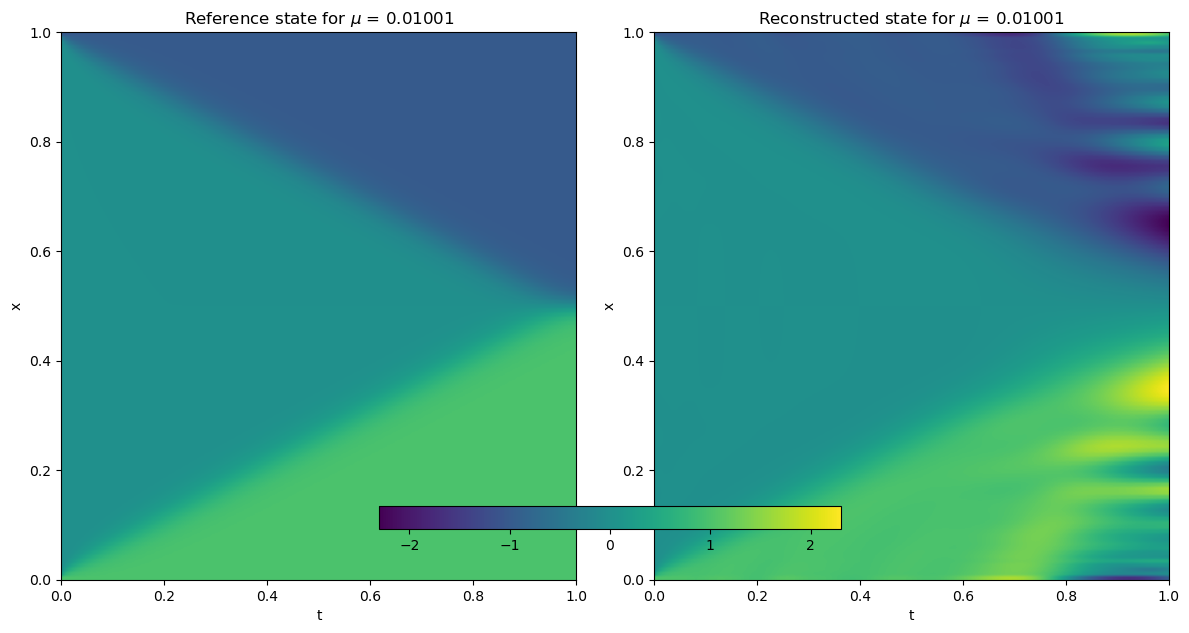

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


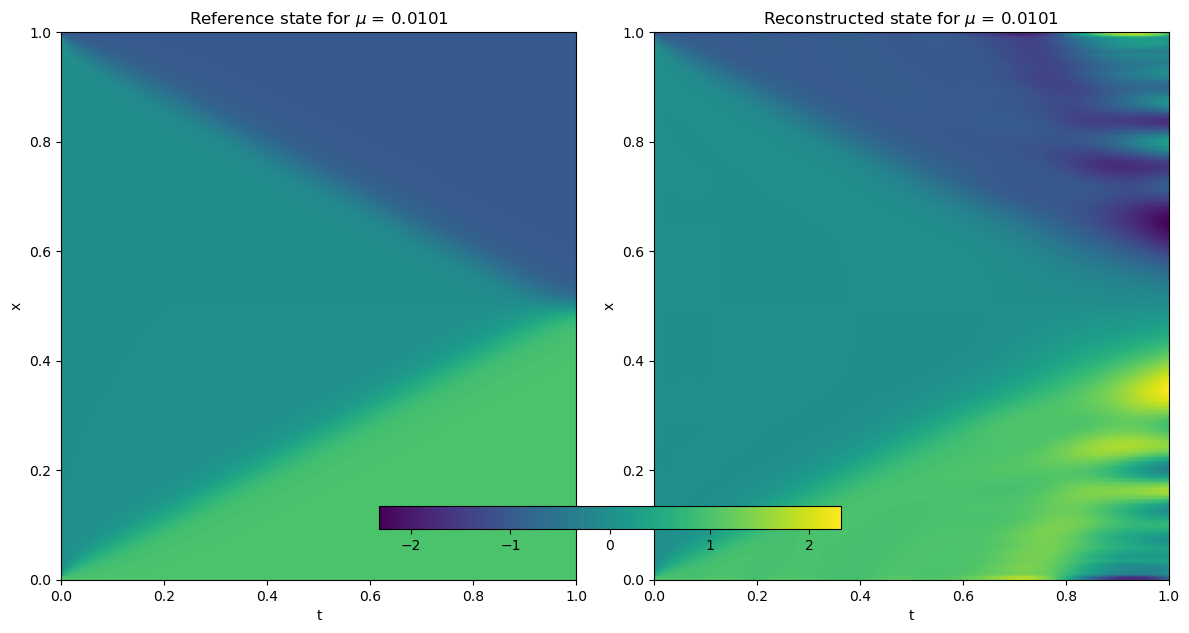

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


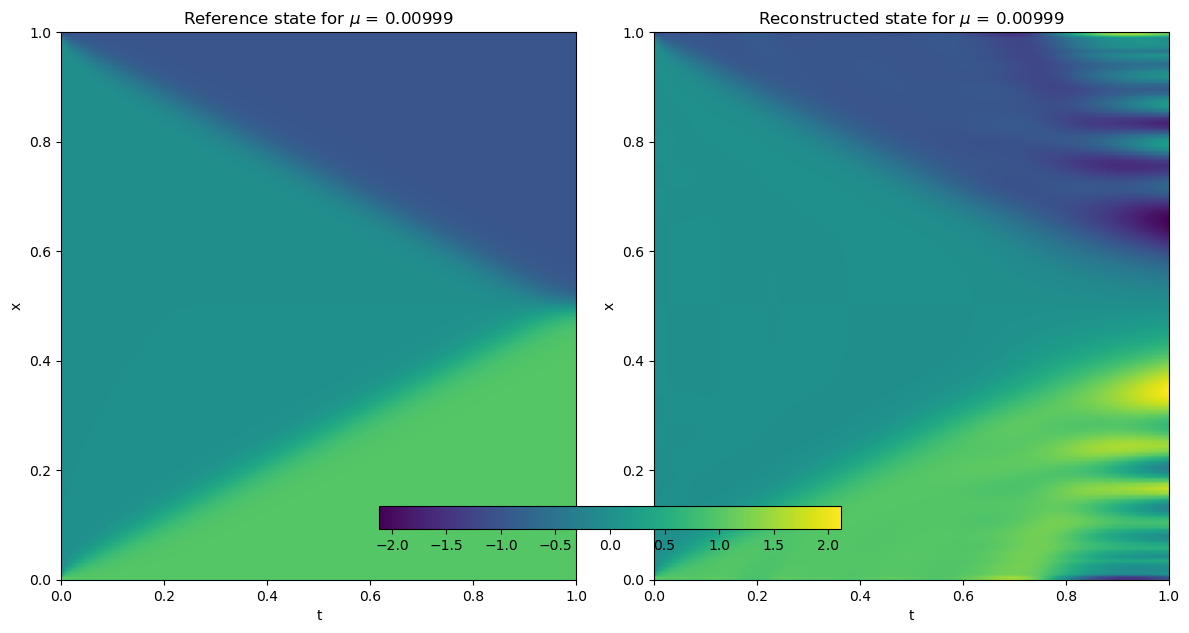

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


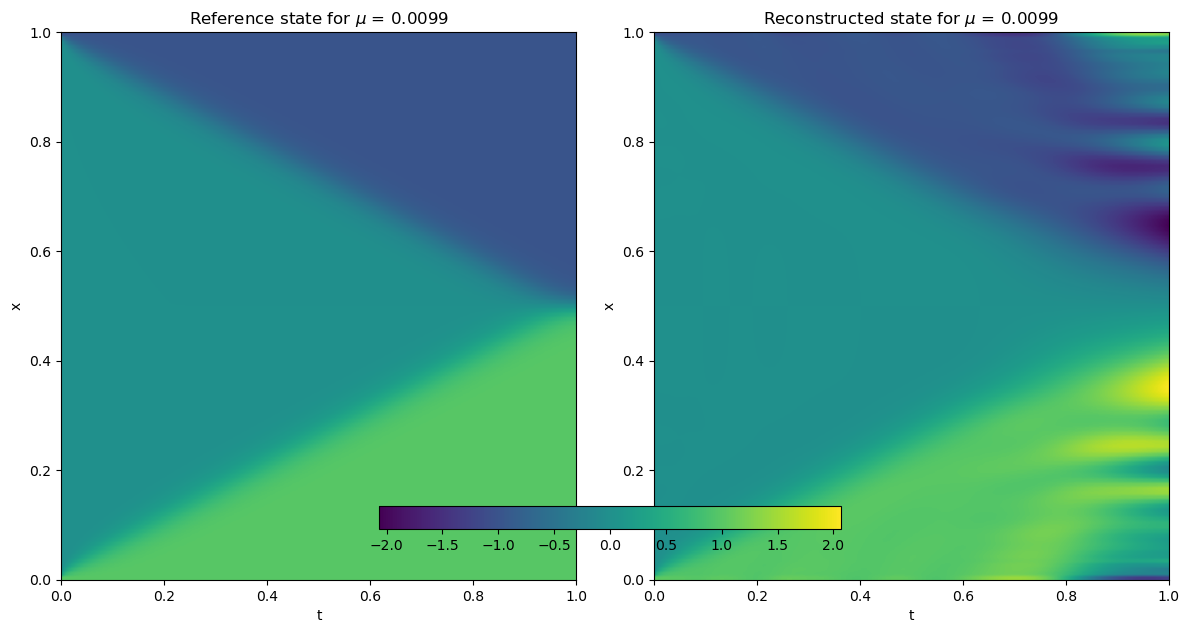

In [228]:
# plot the results side by side
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming s_ref_all is a list of 2D numpy arrays
for i in range(len(mus)):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    X, Y = np.meshgrid(np.linspace(0.0, T_end, int(K+1)), np.linspace(0.0, 1.0, N))
    print("X = ", X.shape)
    print("Y = ", Y.shape)
    print("s_ref_all[i] = ", s_ref_all[i].shape)
    # s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
    c1 = axs[0].imshow(s_ref_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    # plot the trajectory of x coordinate across time, x-axis is time, y-axis is x
    # axs[0].scatter(np.linspace(0.0, T_end, U_all.shape[0]), U_all[:, i], color='red', s=1)
    # fig.colorbar(c)
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title(f'Reference state for $\mu$ = {mus[i]}')
    
    c2 = axs[1].imshow(s_rec_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    
    # fig.colorbar(c)
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_title(f'Reconstructed state for $\mu$ = {mus[i]}')  
    
    # use same colorbar for both plots, the range is determined by the maximum and minimum values of the two plots
    vmin = np.min([np.min(s_ref_all[i]), np.min(s_rec_all[i])])
    vmax = np.max([np.max(s_ref_all[i]), np.max(s_rec_all[i])])
    c1.set_clim(vmin=vmin, vmax=vmax)
    c2.set_clim(vmin=vmin, vmax=vmax)
    
    fig.colorbar(c1, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.tight_layout()
    
    
    plt.show()

In [229]:
# get standard deviation of the reconstructed state
stds = np.std(s_rec_all, axis=0)
print("stds = ", stds.shape)

# load nominal state by finding the file with name containing 'mu_0.01' using glob
nominalState_path = list(Path(datapath).rglob(f's_ref_all_mu_{nominal_mu}_*'))
nominalState = loadmat(nominalState_path[0])['s_ref_all']

# only get the first element of the cell array
nominalState = nominalState[0][0]
print("nominalState = ", nominalState.shape)

stds =  (129, 10001)
nominalState =  (129, 10001)


X =  (129, 10001)
Y =  (129, 10001)
nominalState =  (129, 10001)


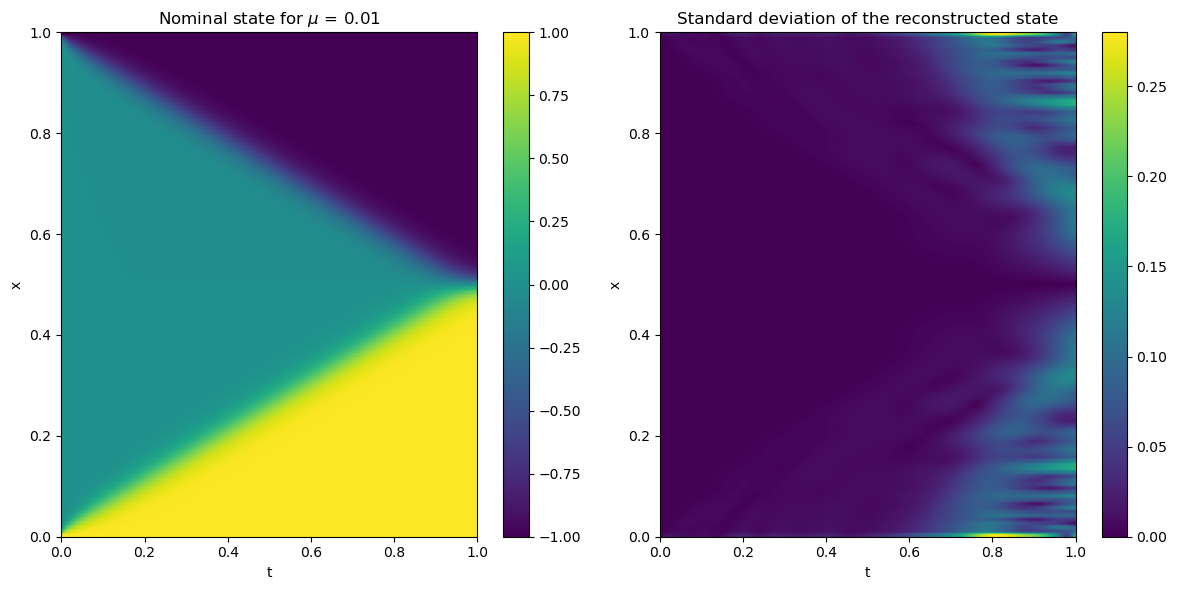

In [230]:
# plot the standard deviation of the reconstructed state on the right side of the nominal state
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
X, Y = np.meshgrid(np.linspace(0.0, T_end, int(K+1)), np.linspace(0.0, 1.0, N))
print("X = ", X.shape)
print("Y = ", Y.shape)
print("nominalState = ", nominalState.shape)
# s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
c1 = axs[0].imshow(nominalState.reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
# color bar for the nominal state plot by getting the minimum and maximum values of the nominal state
vmin = np.min(nominalState)
vmax = np.max(nominalState)
c1.set_clim(vmin=vmin, vmax=vmax)
fig.colorbar(c1)

axs[0].set_xlabel('t')
axs[0].set_ylabel('x')
axs[0].set_title(f'Nominal state for $\mu$ = {nominal_mu}')

c2 = axs[1].imshow(stds.reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')

fig.colorbar(c2)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
axs[1].set_title(f'Standard deviation of the reconstructed state')

plt.tight_layout()
plt.show()


In [231]:
s_ref_all.shape

(4, 129, 10001)

In [232]:
# get the relative error of the reconstructed state except the initial condition
for i in range(len(mus)):
    rel_err = np.linalg.norm(s_rec_all[i][:, 1:] - s_ref_all[i][:, 1:]) / np.linalg.norm(s_ref_all[i][:, 1:])
    print("Relative error for mu = ", mus[i], " is ", rel_err)

Relative error for mu =  0.01001  is  0.3619880153928605
Relative error for mu =  0.0101  is  0.35544503661237453
Relative error for mu =  0.00999  is  0.34139282191782666
Relative error for mu =  0.0099  is  0.3042181091012371
